Objective: The objective of the project is to predict whether a female patient have a diabetic or not based on various features present in the dataset.

Highlights:
- Used libraries such as Numpy,Pandas,Seaborn,Matplotlib
- Used Undersampling(centroid method),OverSampling(SMOTE),SMOTEENN to get the best results
- Used LogisticRegression,KNeighborsClassifier,Support Vector Classifier(SVC),DecisionTreeClassifier,GridSearchCV,Ensemble for each UnderSampling,OverSampling(SMOTE) and SMOTEENN.

<img src="https://e0.pxfuel.com/wallpapers/72/484/desktop-wallpaper-diabetes-chronic-conditions-thumbnail.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


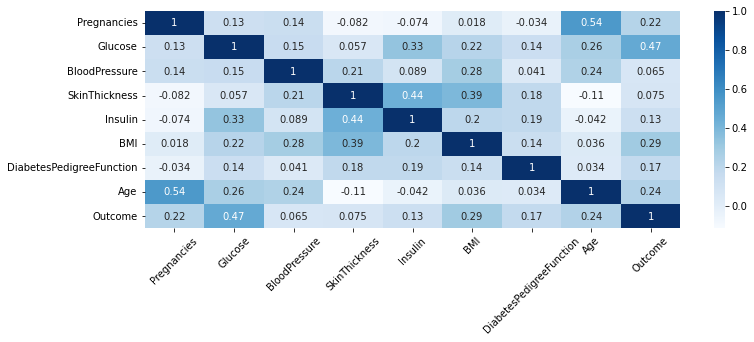

In [3]:
#checking co-relation of each features
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.xticks(rotation=45)
plt.show()

In [4]:
df.info() #checking for datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above we can see that min value of Glucose,BloodPressure,SkinThickness,Insulin and BMI is zero which is not possible means this may be null values filled with zeros

In [6]:
# checking for number of zeros
print(f"Number of zeros in Glucose:- ",df[df["Glucose"]==0].shape[0])
print(f"Number of zeros in BloodPressure:- ",df[df["BloodPressure"]==0].shape[0])
print(f"Number of zeros in SkinThickness:- ",df[df["SkinThickness"]==0].shape[0])
print(f"Number of zeros in Insulin:- ",df[df["Insulin"]==0].shape[0])
print(f"Number of zeros in BMI:- ",df[df["BMI"]==0].shape[0])

Number of zeros in Glucose:-  5
Number of zeros in BloodPressure:-  35
Number of zeros in SkinThickness:-  227
Number of zeros in Insulin:-  374
Number of zeros in BMI:-  11


In [7]:
# Filling with the mean values
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [8]:
# checking for number of zeros
print(f"Number of zeros in Glucose:- ",df[df["Glucose"]==0].shape[0])
print(f"Number of zeros in BloodPressure:- ",df[df["BloodPressure"]==0].shape[0])
print(f"Number of zeros in SkinThickness:- ",df[df["SkinThickness"]==0].shape[0])
print(f"Number of zeros in Insulin:- ",df[df["Insulin"]==0].shape[0])
print(f"Number of zeros in BMI:- ",df[df["BMI"]==0].shape[0])

Number of zeros in Glucose:-  0
Number of zeros in BloodPressure:-  0
Number of zeros in SkinThickness:-  0
Number of zeros in Insulin:-  0
Number of zeros in BMI:-  0


In [9]:
# checking for data imbalance
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

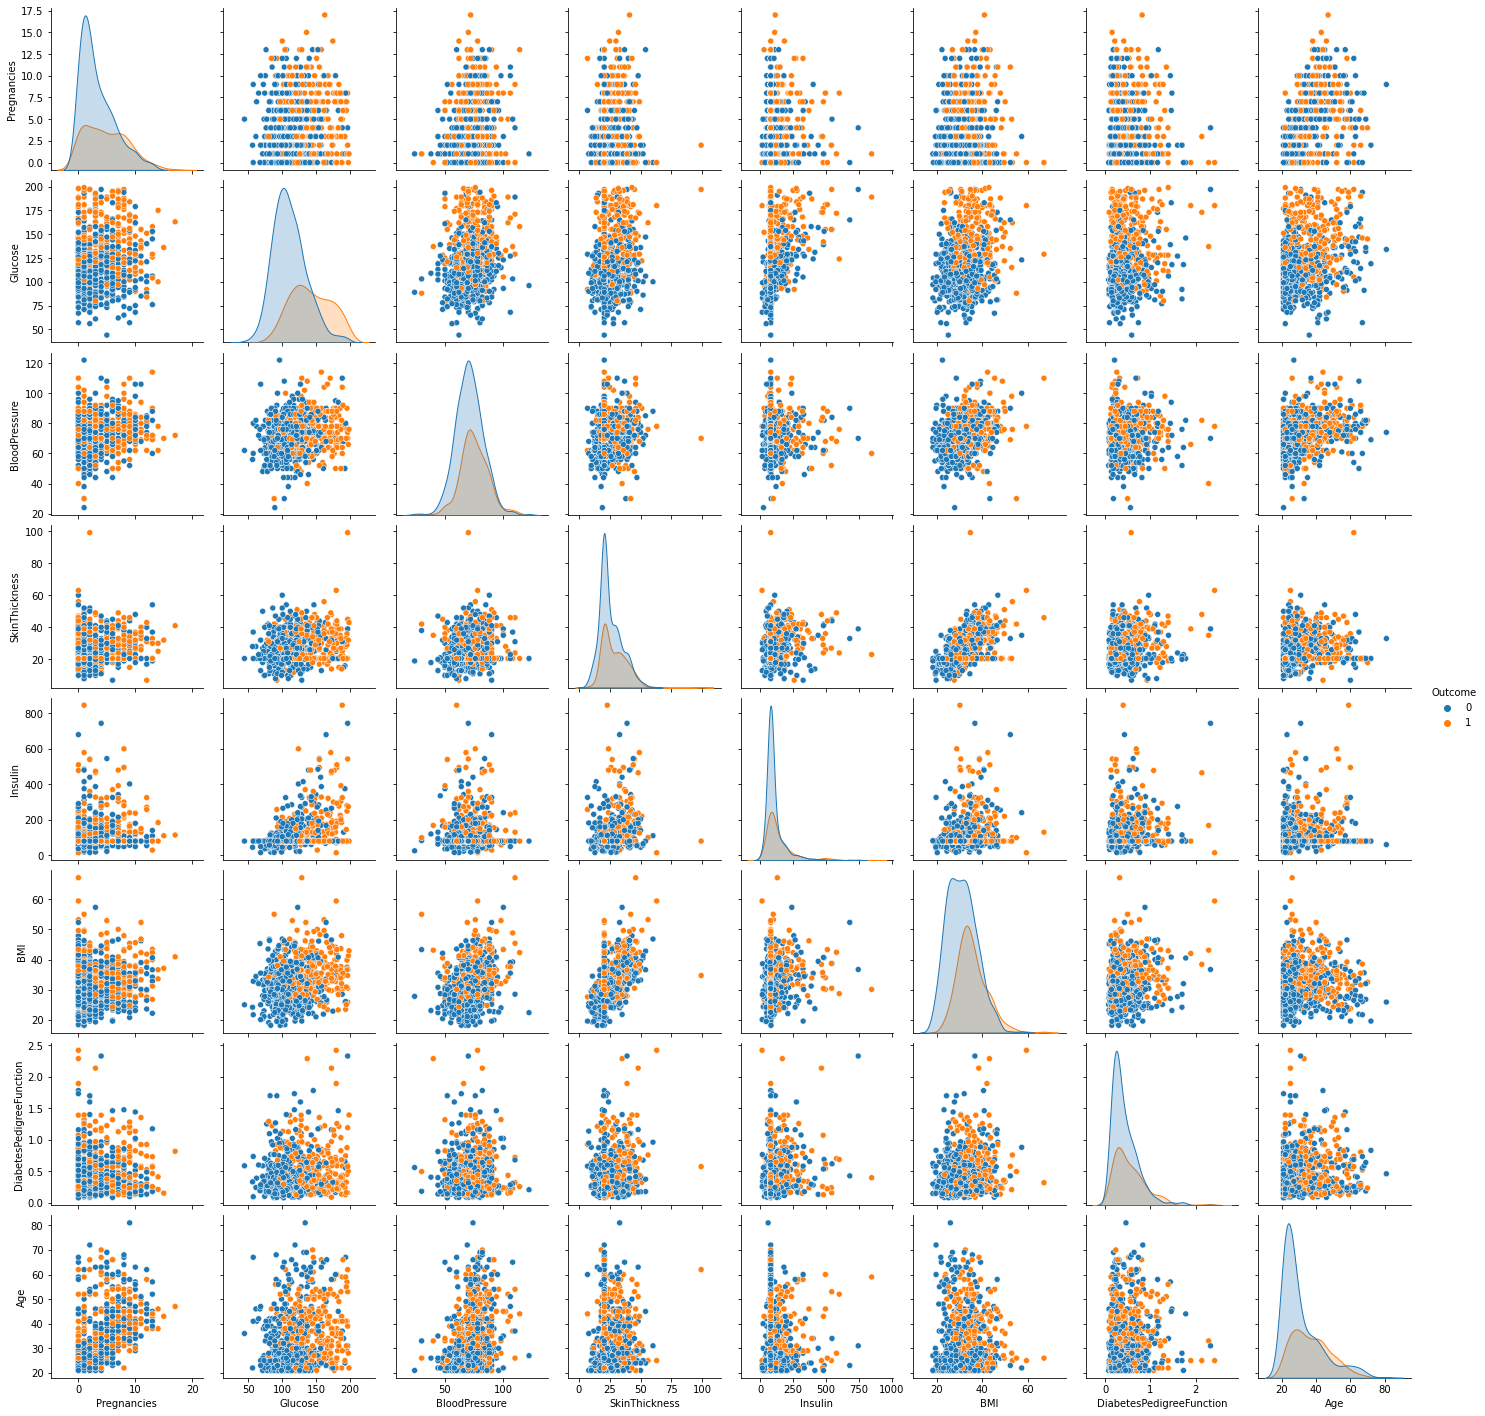

In [10]:
sns.pairplot(df,hue="Outcome")

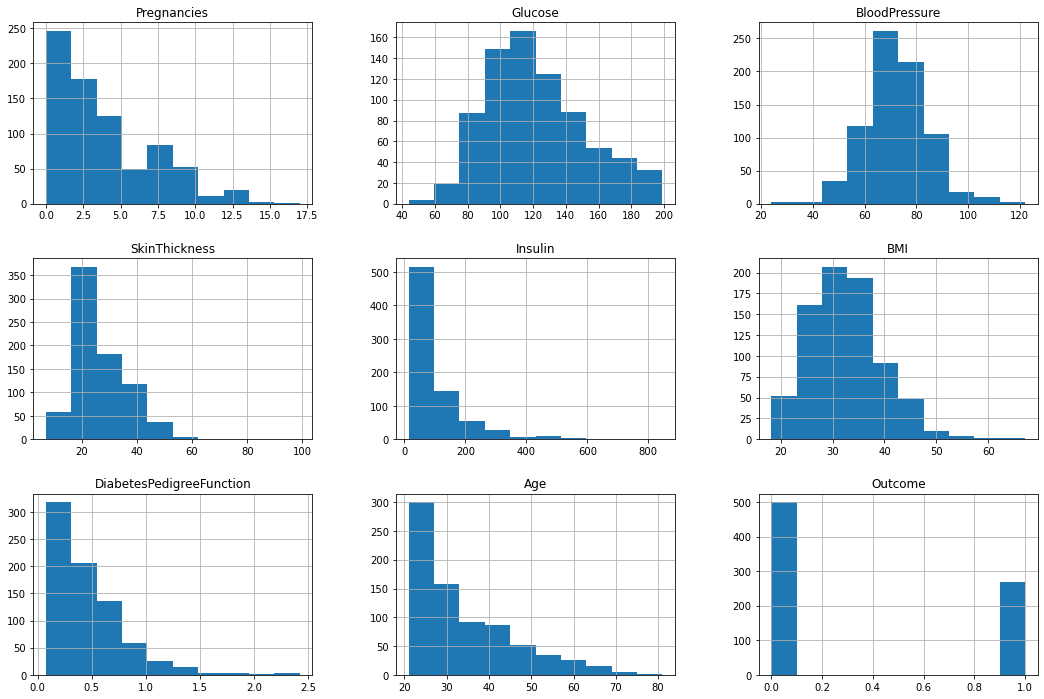

In [11]:
df.hist(figsize=(18,12))
plt.show()

# Handling imbalance data - Oversampling(SMOTE) the data

In [12]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [13]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

# Model Function

In [14]:
def model_select(model):
    from sklearn.preprocessing import StandardScaler
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)
    print(f"Training Accuracy: {train}\nTesting Accuracy:{test}")
    
    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    ra=roc_auc_score(y_test,y_pred)
    print(f"Accuracy:- {ac}\nROC:- {ra}\nconfusion matrix:-\n{cm}\n\nclassification report:-\n{cr}")

##### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
model_select(LogisticRegression())

Training Accuracy: 0.7785714285714286
Testing Accuracy:0.7566666666666667
Accuracy:- 0.7566666666666667
ROC:- 0.7575771082189338
confusion matrix:-
[[117  41]
 [ 32 110]]

classification report:-
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       158
           1       0.73      0.77      0.75       142

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



##### DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_select(DecisionTreeClassifier())

Training Accuracy: 1.0
Testing Accuracy:0.7733333333333333
Accuracy:- 0.7733333333333333
ROC:- 0.7744696024246747
confusion matrix:-
[[119  39]
 [ 29 113]]

classification report:-
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       158
           1       0.74      0.80      0.77       142

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [17]:
parameter = {
           "criterion":["gini","entropy"],
           "max_depth":list(range(1,20)),
           "min_samples_leaf":list(range(1,20))
}

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameter, verbose=2,n_jobs=-1)
model_select(grid)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
Training Accuracy: 0.8428571428571429
Testing Accuracy:0.7333333333333333
Accuracy:- 0.7333333333333333
ROC:- 0.7347120698876805
confusion matrix:-
[[112  46]
 [ 34 108]]

classification report:-
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       158
           1       0.70      0.76      0.73       142

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



In [19]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 14}

In [20]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=14)

In [21]:
model_select(grid.best_estimator_)

Training Accuracy: 0.8428571428571429
Testing Accuracy:0.7333333333333333
Accuracy:- 0.7333333333333333
ROC:- 0.7347120698876805
confusion matrix:-
[[112  46]
 [ 34 108]]

classification report:-
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       158
           1       0.70      0.76      0.73       142

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



In [22]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(DecisionTreeClassifier(), X,y, cv=5,scoring="accuracy")
cvs

array([0.72 , 0.685, 0.715, 0.825, 0.785])

In [23]:
print(f"Avg Accuracy:- {cvs.mean()} \n STD :- {cvs.std().mean()}")

Avg Accuracy:- 0.7460000000000001 
 STD :- 0.05122499389946278


##### SVC

In [24]:
from sklearn.svm import SVC
model_select(SVC())

Training Accuracy: 0.8671428571428571
Testing Accuracy:0.8033333333333333
Accuracy:- 0.8033333333333333
ROC:- 0.8082991620609735
confusion matrix:-
[[113  45]
 [ 14 128]]

classification report:-
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       158
           1       0.74      0.90      0.81       142

    accuracy                           0.80       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.82      0.80      0.80       300



##### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_select(KNeighborsClassifier())

Training Accuracy: 0.8442857142857143
Testing Accuracy:0.7433333333333333
Accuracy:- 0.7433333333333333
ROC:- 0.7477714387591371
confusion matrix:-
[[105  53]
 [ 24 118]]

classification report:-
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       158
           1       0.69      0.83      0.75       142

    accuracy                           0.74       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.76      0.74      0.74       300



# Undersampling (Centroid Method)

In [26]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X,y = cc.fit_resample(X,y)

##### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_select(LogisticRegression())

Training Accuracy: 0.736
Testing Accuracy:0.6583850931677019
Accuracy:- 0.6583850931677019
ROC:- 0.6657347002174588
confusion matrix:-
[[56 18]
 [37 50]]

classification report:-
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        74
           1       0.74      0.57      0.65        87

    accuracy                           0.66       161
   macro avg       0.67      0.67      0.66       161
weighted avg       0.67      0.66      0.66       161



##### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model_select(KNeighborsClassifier())

Training Accuracy: 0.7706666666666667
Testing Accuracy:0.7204968944099379
Accuracy:- 0.7204968944099379
ROC:- 0.7191674433053743
confusion matrix:-
[[52 22]
 [23 64]]

classification report:-
              precision    recall  f1-score   support

           0       0.69      0.70      0.70        74
           1       0.74      0.74      0.74        87

    accuracy                           0.72       161
   macro avg       0.72      0.72      0.72       161
weighted avg       0.72      0.72      0.72       161



In [29]:
from sklearn.tree import DecisionTreeClassifier
model_select(DecisionTreeClassifier())

Training Accuracy: 1.0
Testing Accuracy:0.6024844720496895
Accuracy:- 0.6024844720496895
ROC:- 0.6089624106865487
confusion matrix:-
[[51 23]
 [41 46]]

classification report:-
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        74
           1       0.67      0.53      0.59        87

    accuracy                           0.60       161
   macro avg       0.61      0.61      0.60       161
weighted avg       0.62      0.60      0.60       161



##### SVM

In [30]:
from sklearn.svm import SVC
model_select(SVC())

Training Accuracy: 0.8053333333333333
Testing Accuracy:0.7142857142857143
Accuracy:- 0.7142857142857143
ROC:- 0.7164492078285181
confusion matrix:-
[[55 19]
 [27 60]]

classification report:-
              precision    recall  f1-score   support

           0       0.67      0.74      0.71        74
           1       0.76      0.69      0.72        87

    accuracy                           0.71       161
   macro avg       0.72      0.72      0.71       161
weighted avg       0.72      0.71      0.71       161



##### EasyEnsembleClassifier

In [31]:
from imblearn.ensemble import EasyEnsembleClassifier
model_select(EasyEnsembleClassifier())

Training Accuracy: 0.864
Testing Accuracy:0.6583850931677019
Accuracy:- 0.6583850931677019
ROC:- 0.6677539608574091
confusion matrix:-
[[58 16]
 [39 48]]

classification report:-
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        74
           1       0.75      0.55      0.64        87

    accuracy                           0.66       161
   macro avg       0.67      0.67      0.66       161
weighted avg       0.68      0.66      0.66       161



# SMOTEENN

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X,y = smoteenn.fit_resample(X,y)

##### SVC

In [33]:
from sklearn.svm import SVC
model_select(SVC())

Training Accuracy: 0.9683377308707124
Testing Accuracy:0.9631901840490797
Accuracy:- 0.9631901840490797
ROC:- 0.9600619195046439
confusion matrix:-
[[64  4]
 [ 2 93]]

classification report:-
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.96      0.98      0.97        95

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



##### Logistic

In [34]:
from sklearn.linear_model import LogisticRegression
model_select(LogisticRegression())

Training Accuracy: 0.920844327176781
Testing Accuracy:0.9141104294478528
Accuracy:- 0.9141104294478528
ROC:- 0.9137770897832816
confusion matrix:-
[[62  6]
 [ 8 87]]

classification report:-
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        68
           1       0.94      0.92      0.93        95

    accuracy                           0.91       163
   macro avg       0.91      0.91      0.91       163
weighted avg       0.91      0.91      0.91       163



##### DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_select(DecisionTreeClassifier())

Training Accuracy: 1.0
Testing Accuracy:0.8895705521472392
Accuracy:- 0.8895705521472392
ROC:- 0.9010835913312693
confusion matrix:-
[[66  2]
 [16 79]]

classification report:-
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        68
           1       0.98      0.83      0.90        95

    accuracy                           0.89       163
   macro avg       0.89      0.90      0.89       163
weighted avg       0.90      0.89      0.89       163



##### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_select(KNeighborsClassifier())

Training Accuracy: 0.941952506596306
Testing Accuracy:0.9447852760736196
Accuracy:- 0.9447852760736196
ROC:- 0.9359133126934984
confusion matrix:-
[[60  8]
 [ 1 94]]

classification report:-
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.92      0.99      0.95        95

    accuracy                           0.94       163
   macro avg       0.95      0.94      0.94       163
weighted avg       0.95      0.94      0.94       163



##### Ensemble Method

In [37]:
from imblearn.ensemble import EasyEnsembleClassifier
model_select(EasyEnsembleClassifier())

Training Accuracy: 0.9920844327176781
Testing Accuracy:0.9386503067484663
Accuracy:- 0.9386503067484663
ROC:- 0.9431888544891641
confusion matrix:-
[[66  2]
 [ 8 87]]

classification report:-
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.98      0.92      0.95        95

    accuracy                           0.94       163
   macro avg       0.93      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163



##### After implementation of  undersampling (centroid method) , oversampling smote mix of undersampling and oversampling (smoteenn) the smoteenn gave best results in SVC model also the False Negative or Type 2 Error is least in SVC hence SVC is the best Model

*************************************************
SVC by smoteenn

Training Accuracy: 0.9683377308707124

Testing Accuracy:0.9631901840490797

Accuracy:- 0.9631901840490797

ROC:- 0.9600619195046439

confusion matrix:-

[[ 64    4 ]

 [ 2  93 ]]

classification report:-
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.96      0.98      0.97        95

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163